In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:

look_back = i
data = pd.read_csv('feedable(new)(verion-2)(lb-' + str(look_back) + '.csv')
train_Data = data.head(2660)
test_Data = data.tail(1140)

true_output_train = train_Data["expected_glucose"]
input_features_train = train_Data.drop(["expected_glucose"] , axis=1)

true_output_test = test_Data["expected_glucose"]
input_features_test = test_Data.drop(["expected_glucose"] , axis=1)
error = []

for i in range(1,10):
    num_neigh = i
    neigh = KNeighborsRegressor(n_neighbors=num_neigh)
    neigh.fit(input_features_train ,true_output_train )
    predict_train = neigh.predict(input_features_train)
    mse_on_train = mean_squared_error(true_output_train , predict_train)
    #print("M.S.E on training data" , mse_on_train)
    predict_test = neigh.predict(input_features_test)
    mse_on_test = mean_squared_error(true_output_test , predict_test)
    error.append((mse_on_test)**(1/2))

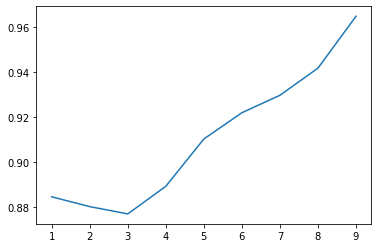

0.8768574549624345


In [9]:
import matplotlib.pyplot as plt
x = [i for i in range(1,10)]
plt.plot(x , error)
plt.show()
print(min(error))

In [5]:
error

[0.8844656115286322,
 0.8801074843212044,
 0.8768574549624345,
 0.8891328128239424,
 0.91017399996957,
 0.9218411140783302,
 0.9296029255949375,
 0.9416753043356082,
 0.9647390151007089]